# Problem 1

## Mounting Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import yfinance as yf


## Problem 1 a) PCA Model

### 1. Log Returns

In [5]:
file_path = "/content/drive/MyDrive/IS733/Assignments/Assignment 3/Data/SP500_close_price_no_missing.csv"

df = pd.read_csv(file_path,parse_dates=['date'],index_col='date')

In [6]:
# Calculate log returns
log_returns = df.pct_change().apply(lambda x: np.log(1 + x))

#Print the results
print("Original DataFrame:")
print(df.head())
print("\nLog Returns:")
print(log_returns.head())

Original DataFrame:
              MMM    ACE    ABT    ANF   ADBE   AMD    AES    AET    AFL  \
date                                                                       
2011-01-03  86.79  62.24  47.82  58.03  31.29  8.47  12.54  31.04  57.54   
2011-01-04  86.67  62.20  48.27  56.22  31.51  8.77  12.60  31.20  56.49   
2011-01-05  86.67  61.99  48.27  55.35  32.22  8.91  12.77  31.50  56.38   
2011-01-06  86.14  61.72  48.17  53.53  32.27  8.69  12.99  32.09  56.07   
2011-01-07  86.23  61.26  48.37  53.57  32.04  8.83  12.99  32.16  55.85   

                A  ...    WYN    WYNN    XEL    XRX   XLNX     XL   YHOO  \
date               ...                                                     
2011-01-03  41.88  ...  30.67  108.99  23.56  11.71  29.42  22.16  16.75   
2011-01-04  41.49  ...  30.48  112.39  23.66  11.40  29.54  22.05  16.59   
2011-01-05  41.40  ...  30.38  113.84  23.52  11.46  29.64  22.17  16.91   
2011-01-06  41.48  ...  29.94  114.67  23.50  11.46  30.14  22.16  

### 2.Scree Plot

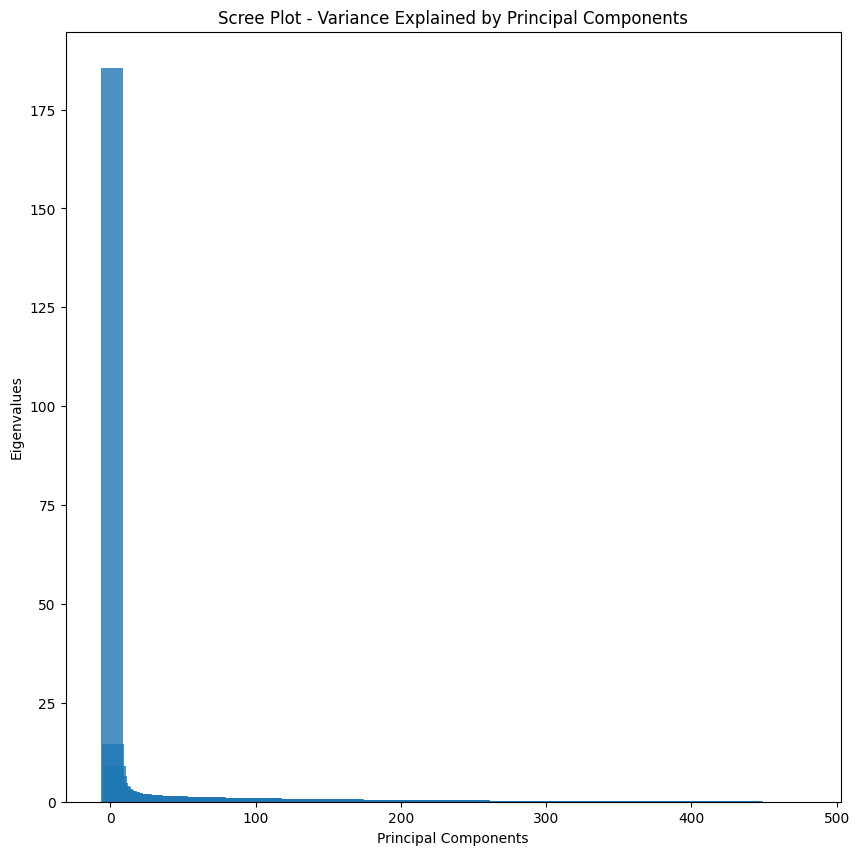

In [25]:
# Drop rows with any remaining missing values
log_returns = log_returns.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_returns)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Get eigenvalues
eigenvalues = pca.explained_variance_

# Plot scree plot
plt.figure(figsize=(10, 10))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, align='center',width=15)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot - Variance Explained by Principal Components')
plt.show()

### 3. Cumulative Variance

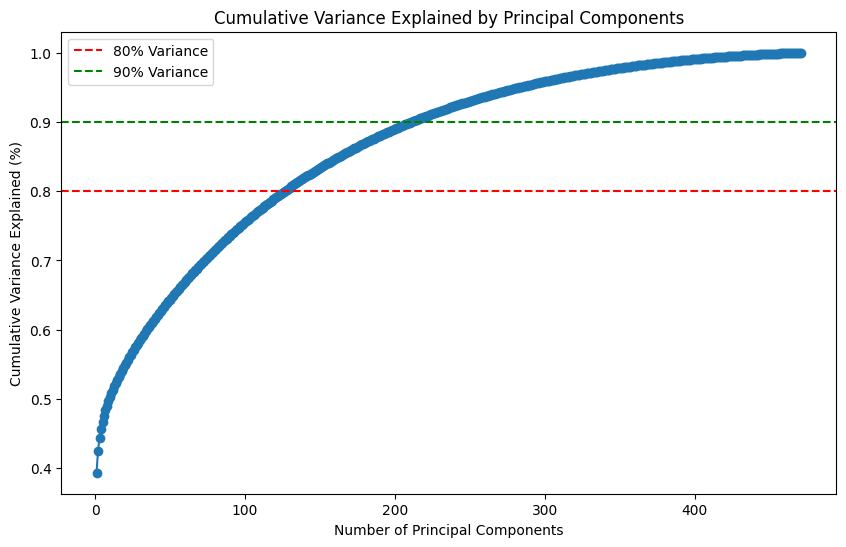

In [26]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_returns)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained by Principal Components')
plt.legend()
plt.show()


### 4. Number of principle components

In [27]:
# Find the number of components that capture at least 80% of the variance
n_components_80_percent = np.argmax(cumulative_variance >= 0.8) + 1

# Find the number of components that capture at least 80% of the variance
n_components_90_percent = np.argmax(cumulative_variance >= 0.9) + 1

print(f"Number of components needed to capture at least 80% of variance: {n_components_80_percent}")

print(f"Number of components needed to capture at least 90% of variance: {n_components_90_percent}")

Number of components needed to capture at least 80% of variance: 127
Number of components needed to capture at least 90% of variance: 211


## Problem 1b) Analysis of principal components and weights

### 1.Time Series

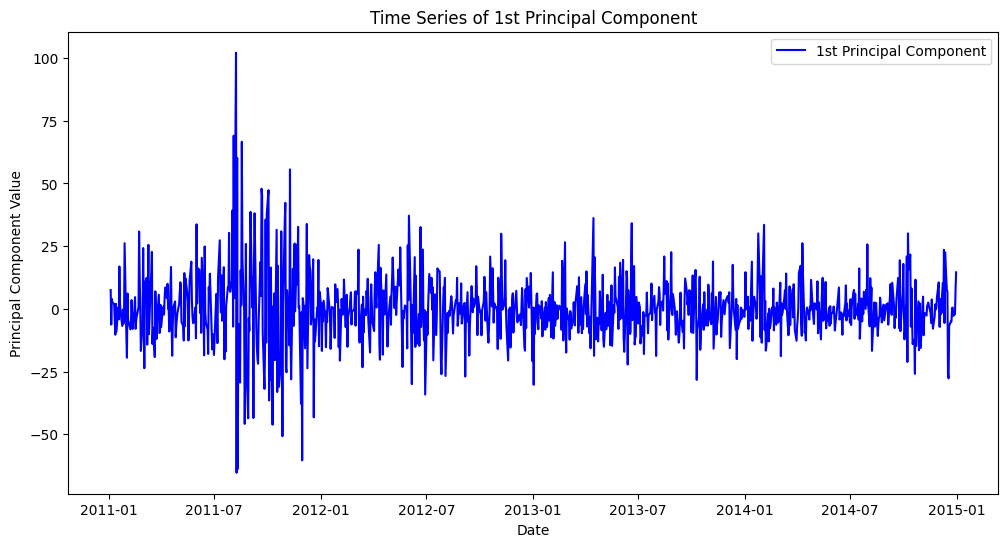

Date with the lowest value for the 1st principal component: 2011-08-09 00:00:00
Lowest value for the 1st principal component: -65.36945884369223


In [13]:
# Extract the 1st principal component time series
pc1_time_series = principal_components[:, 0]

# Plot the time series of the 1st principal component
plt.figure(figsize=(12, 6))
plt.plot(log_returns.index, pc1_time_series, label='1st Principal Component', color='blue')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.title('Time Series of 1st Principal Component')
plt.legend()
plt.show()

# Identify the date with the lowest value for the 1st principal component
min_pc1_date = log_returns.index[np.argmin(pc1_time_series)]
min_pc1_value = np.min(pc1_time_series)

print(f"Date with the lowest value for the 1st principal component: {min_pc1_date}")
print(f"Lowest value for the 1st principal component: {min_pc1_value}")

### 2. Weights for pc1 and pc2

In [12]:
# Extract weights for the 1st and 2nd principal components
weights_pc1 = pca.components_[0, :]
weights_pc2 = pca.components_[1, :]

# Display the weights
print("Weights for the 1st Principal Component:")
print(weights_pc1)

print("\nWeights for the 2nd Principal Component:")
print(weights_pc2)

Weights for the 1st Principal Component:
[-0.06148286 -0.05612293 -0.01338367 -0.03142776 -0.04873121 -0.03739019
 -0.05189389 -0.04368021 -0.05903906 -0.05146821 -0.05518395 -0.05411716
 -0.04362366 -0.0379498  -0.05502761 -0.05357572 -0.04042444 -0.05536893
 -0.04513837 -0.03938982 -0.03666691 -0.04441632 -0.04092533 -0.05768976
 -0.05357866 -0.04201156 -0.06338442 -0.04514652 -0.03825544 -0.03280334
 -0.0522285  -0.05389427 -0.05285698 -0.05189078 -0.05046586 -0.02746048
 -0.00855835 -0.05017396 -0.05091829 -0.05338743 -0.04309722 -0.04969014
 -0.0555124  -0.04393453 -0.03207285 -0.04537758 -0.05116935 -0.03199813
 -0.04889843 -0.0251804  -0.05309729 -0.05897595 -0.04608874 -0.04877988
 -0.05732623 -0.04962918 -0.03849037 -0.05048002 -0.06121387 -0.02521246
 -0.02667146 -0.0364229  -0.06182838 -0.04243292 -0.0026297  -0.05293305
 -0.05372974 -0.04229311 -0.03708482 -0.04393482 -0.03557961 -0.04287546
 -0.05175368 -0.03206475 -0.02687835 -0.05160657 -0.03594994 -0.0544989
 -0.0475701

### 3. Weights of 1st principal components

In [19]:
# Step 1: Load datasets
# Assuming 'stock_data.csv' contains stock data and 'ticker_info.csv' contains ticker information
stock_data = pd.read_csv('/content/drive/MyDrive/IS733/Assignments/Assignment 3/Data/SP500_close_price_no_missing.csv', parse_dates=['date'], index_col='date')
ticker_info = pd.read_csv('/content/drive/MyDrive/IS733/Assignments/Assignment 3/Data/SP500_ticker.csv',encoding='latin1')
ticker_info['sector'] = ticker_info['sector'].str.strip()


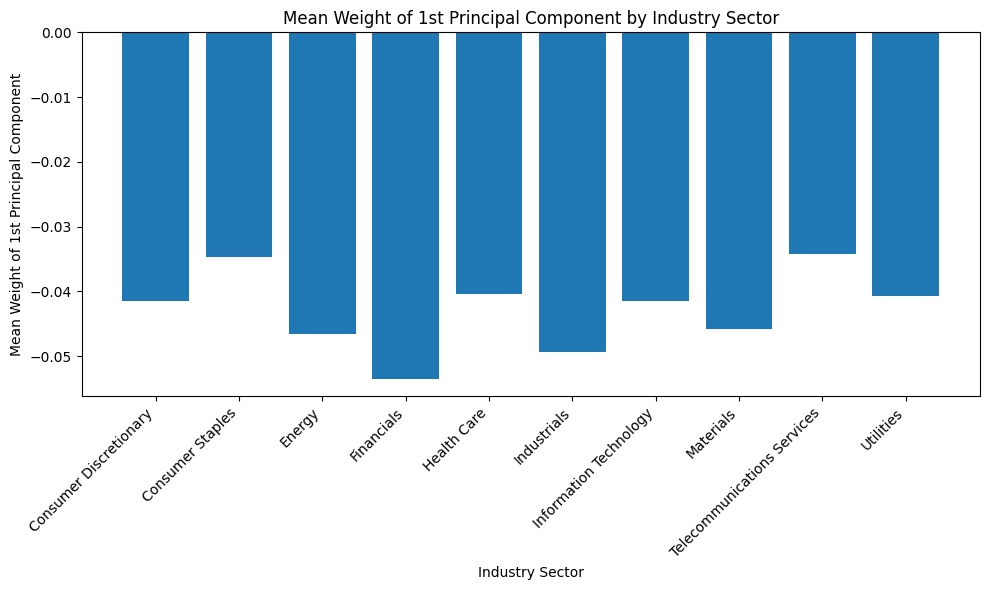

In [21]:
# Step 2: Apply PCA to the stock data
log_returns = stock_data.pct_change().apply(lambda x: np.log(1 + x))
log_returns = log_returns.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_returns)
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Step 3: Extract weights of the 1st principal component
weights_pc1 = pca.components_[0]

# Step 4: Merge principal component weights with ticker information
df_weights = pd.DataFrame(weights_pc1, index=log_returns.columns, columns=['PC1 Weight'])
df_merged = pd.merge(df_weights, ticker_info, left_index=True, right_on='ticker', how='left')

# Step 5: Group by industry sector and calculate mean weight
mean_weights_by_sector = df_merged.groupby('sector')['PC1 Weight'].mean().reset_index()

# Step 6: Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(mean_weights_by_sector['sector'], mean_weights_by_sector['PC1 Weight'])
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight of 1st Principal Component')
plt.title('Mean Weight of 1st Principal Component by Industry Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Weights of 2nd principal components

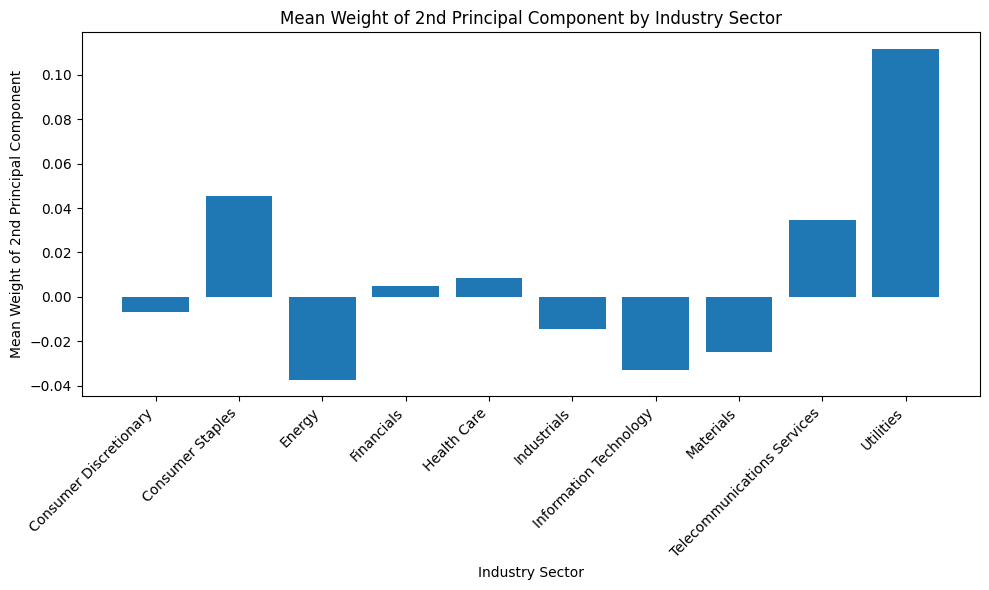

In [24]:
# Step 3: Extract weights of the 1st principal component
weights_pc2 = pca.components_[1]

# Step 4: Merge principal component weights with ticker information
df_weights_2 = pd.DataFrame(weights_pc2, index=log_returns.columns, columns=['PC2 Weight'])
df_merged_2 = pd.merge(df_weights_2, ticker_info, left_index=True, right_on='ticker', how='left')

# Step 5: Group by industry sector and calculate mean weight
mean_weights_by_sector_2 = df_merged_2.groupby('sector')['PC2 Weight'].mean().reset_index()

# Step 6: Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(mean_weights_by_sector_2['sector'], mean_weights_by_sector_2['PC2 Weight'])
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight of 2nd Principal Component')
plt.title('Mean Weight of 2nd Principal Component by Industry Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Problem 1 c)

[*********************100%%**********************]  5 of 5 completed
PC1: 0.5811
PC2: 0.7301
PC3: 0.8405
PC4: 0.9369
PC5: 1.0000


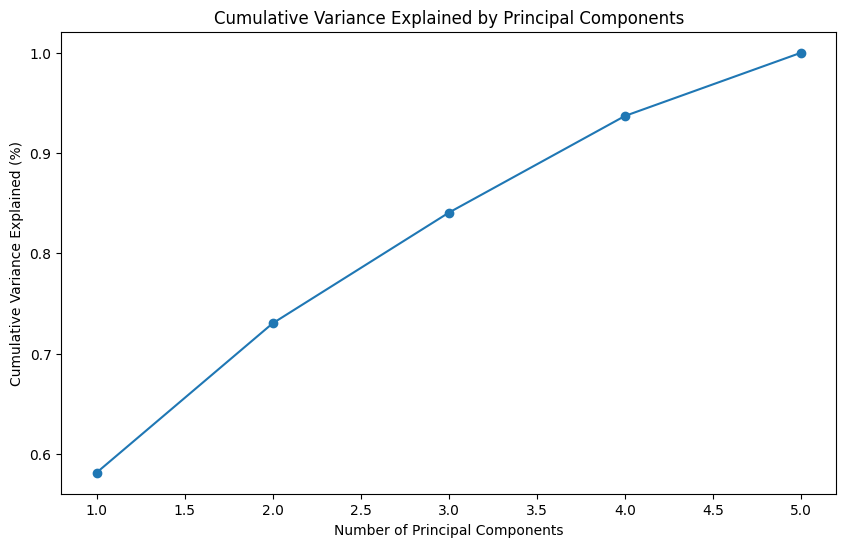

In [49]:
# Function to download stock data
def download_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Define the list of stock tickers
stock_tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']

# Define the date range for stock data
start_date = '2023-01-01'
end_date = '2023-11-30'

# Download stock data
stock_data = download_stock_data(stock_tickers, start_date, end_date)

# Calculate log returns
log_returns = stock_data.pct_change().apply(lambda x: np.log(1 + x))

# Drop rows with any remaining missing values
log_returns = log_returns.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_returns)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print cumulative variance explained by each principal component
for i, var in enumerate(cumulative_variance, start=1):
    print(f"PC{i}: {var:.4f}")

# Plot cumulative variance explained
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()

# Problem 2

## Importing libraries

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/IS733/Assignments/Assignment 3/Data/BMI.csv"

data = pd.read_csv(file_path)

In [ ]:
# Extract the predictor variables (excluding 'FatPctg')
X = data.drop(['fatpctg'], axis=1)

# Add a constant for the intercept term
X = sm.add_constant(X)

# Response variable
y = data['fatpctg']

## 2.a Wrapper Method

### Backward Regressrion

In [ ]:
# Backward stepwise regression
def backward_stepwise_regression(X, y):
    features = list(X.columns)
    while len(features) > 0:
        X_subset = X[features]
        model = sm.OLS(y, X_subset).fit()
        max_pvalue = model.pvalues.drop('const').max()
        if max_pvalue > 0.05:
            remove_feature = model.pvalues.drop('const').idxmax()
            features.remove(remove_feature)
        else:
            break
    return features

backward_selected_features = backward_stepwise_regression(X, y)
print("Backward Selected Features:", backward_selected_features)

Backward Selected Features: ['const', 'Age', 'Neck', 'Abdomen', 'Hip', 'Thigh', 'Forearm', 'Wrist']


### Forward Regression

In [ ]:
# Forward stepwise regression
def forward_stepwise_regression(X, y):
    features = []
    remaining_features = list(X.columns)
    while len(remaining_features) > 0:
        best_pvalue = 1.0
        for feature in remaining_features:
            X_subset = X[features + [feature]]
            model = sm.OLS(y, X_subset).fit()
            pvalue = model.pvalues[feature]
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature
        if best_pvalue < 0.05:
            features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    return features

forward_selected_features = forward_stepwise_regression(X, y)
print("Forward Selected Features:", forward_selected_features)

Forward Selected Features: ['Abdomen', 'Wrist', 'Hip', 'Neck', 'Forearm', 'Age', 'Thigh']


## 2.b Filter Method

In [ ]:
# Calculate the correlation coefficients
correlation_matrix = data.corr()

# Sort the features based on their correlation with 'FatPctg'
correlation_ranking = correlation_matrix['fatpctg'].abs().drop('fatpctg').sort_values(ascending=False)

In [ ]:
# Print the feature ranking
print("Feature Ranking based on Correlation:")
print(correlation_ranking)

Feature Ranking based on Correlation:
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
Name: fatpctg, dtype: float64


## 2.c Embedded Method

### 1. Lasso Regression

In [ ]:
# Separate predictors (X) and target variable (y)
X = data.drop(['fatpctg'], axis=1)
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Lasso regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression model
alpha = 0.01  # You can adjust the regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X.columns[lasso_model.coef_ != 0]

# Print the features in a nice table format
table = tabulate({"Selected Features": selected_features}, headers="keys", tablefmt="pretty")
print(table)

+-------------------+
| Selected Features |
+-------------------+
|        Age        |
|      Weight       |
|      Height       |
|       Neck        |
|       Chest       |
|      Abdomen      |
|        Hip        |
|       Thigh       |
|       Ankle       |
|      Biceps       |
|      Forearm      |
|       Wrist       |
+-------------------+


### 2. Random Forest (Feature Importance Ranking)

Feature Importance Ranking:
    Feature  Importance
5   Abdomen    0.714957
1    Weight    0.031164
12    Wrist    0.030504
2    Height    0.029040
6       Hip    0.028463
3      Neck    0.026902
4     Chest    0.024049
0       Age    0.023840
9     Ankle    0.019951
10   Biceps    0.019619
8      Knee    0.019410
11  Forearm    0.016606
7     Thigh    0.015493


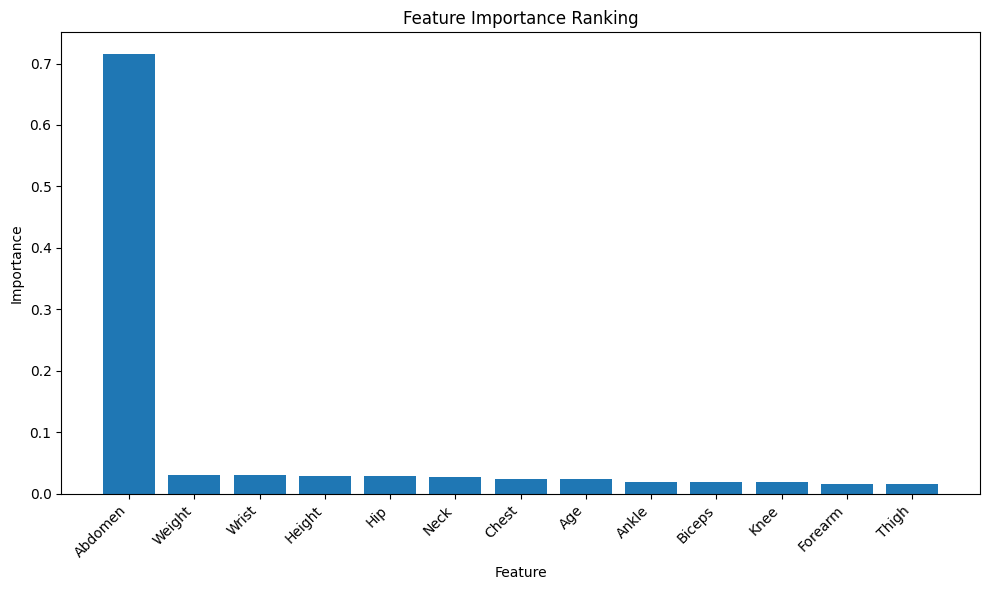

In [ ]:
# Separate predictors (X) and target variable (y)
X = data.drop(['fatpctg'], axis=1)
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest regression model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance ranking
print("Feature Importance Ranking:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Ranking')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()